In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# plt.rcParams['axes.unicode_minus'] = False

In [2]:
df1 = pd.read_excel('GRDP_시도.xlsx')  # GRDP             =====================> 정규화
df2 = pd.read_excel('경제성장률_시도__20230222224924.xlsx')   # 경제성장률                =======> 정규화
df4 = pd.read_excel('경제활동인구_시도__20230222225929.xlsx')  # 경제활동인구====> 비율    =======> 정규화
df3 = pd.read_excel('고령인구비율_시도_시_군_구__20230222225425.xlsx') # 고령인구비율      =======> 정규화         123, 124  ==> 그래프에 담기

In [3]:
# df1.to_excel('GRDP_시도.xlsx', index=False)
# df2.to_excel('경제성장률_시도__20230222224924.xlsx', index=False)
# df3.to_excel('경제활동인구_시도__20230222225929.xlsx', index=False)
# df4.to_excel('고령인구비율_시도_시_군_구__20230222225425.xlsx', index=False)

In [4]:
df1 = df1.loc[2:,[col for col in df1.columns if col >= '2000' and len(col)==6]]

In [5]:
df1=df1.rename(columns={'시도별(1)':'도시'})

In [6]:
df1.set_index('도시',inplace=True)

In [7]:
df1.columns =[col[:4] for col in df1.columns]

In [8]:
sido_df1=df1.loc['서울특별시':'세종특별자치시',:]

In [9]:
sido_df1=sido_df1.replace('-',np.nan)

In [10]:
sido_d1f=sido_df1.dropna(axis=0,inplace=True)

In [11]:
grdp1 = sido_df1.T

In [12]:
grdp1

도시,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
2000,234450139.0,51705541.0,33378959.0,43019365.0,19742330.0,23066261.0,49333661.0
2001,244418894.0,55382619.0,34134803.0,46255108.0,20828849.0,23813574.0,50423452.0
2002,261328220.0,57866997.0,35743105.0,50972798.0,22420270.0,25497366.0,55068266.0
2003,266033918.0,59924431.0,36396595.0,52157498.0,22585186.0,26757005.0,54100049.0
2004,269197325.0,61227100.0,38364894.0,54987798.0,23198230.0,27540951.0,59706880.0
2005,280676032.0,63032743.0,39039831.0,56922112.0,24953345.0,28061744.0,61626834.0
2006,292392945.0,65299325.0,40255437.0,59522631.0,26193910.0,29074607.0,62869561.0
2007,309525926.0,68944140.0,42074727.0,64675503.0,27392264.0,29906786.0,65950587.0
2008,317128072.0,70785024.0,42614503.0,64033773.0,27791206.0,30273625.0,64401338.0
2009,321873162.0,68336815.0,41429265.0,63153061.0,27180608.0,31068315.0,63392764.0


In [13]:
df2=df2.loc[1:,[col for col in df2.columns if col >= '2000']]

In [14]:
df2=df2.rename(columns={'행정구역별(1)':'도시'})

In [15]:
df2=df2.set_index('도시')

In [16]:
sido_df2=df2.loc['서울특별시':'세종특별자치시',:]

In [17]:
sido_df2=sido_df2.replace('-',np.nan)

In [18]:
eco_g_per=sido_df2.dropna(axis=0)

In [19]:
eco_g_per1=eco_g_per.T

In [20]:
eco_g_per1

도시,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
2000,10.0,3.9,5.9,6.4,9.1,9.1,3.3
2001,4.3,7.1,2.3,7.5,5.5,3.2,2.2
2002,6.9,4.5,4.7,10.2,7.6,7.1,9.2
2003,1.8,3.6,1.8,2.3,0.7,4.9,-1.8
2004,1.2,2.2,5.4,5.4,2.7,2.9,10.4
2005,4.3,2.9,1.8,3.5,7.6,1.9,3.2
2006,4.2,3.6,3.1,4.6,5.0,3.6,2.0
2007,5.9,5.6,4.5,8.7,4.6,2.9,4.9
2008,2.5,2.7,1.3,-1.0,1.5,1.2,-2.3
2009,1.5,-3.5,-2.8,-1.4,-2.2,2.6,-1.6


In [21]:
sido_df3=df3.loc[2:,['행정구역별(1)'] +[col for col in df3.columns if col >= '2000' and col <= '2021' and len(col) == 4]]

In [22]:
sido_df3= sido_df3.rename(columns={'행정구역별(1)':'도시'})

In [23]:
sido_df3 = sido_df3.set_index('도시')

In [24]:
oldmen_per=sido_df3.loc['서울특별시':'세종특별자치시',:]

In [25]:
oldmen_per= oldmen_per.replace('-', np.nan)

In [26]:
oldmen_per1= oldmen_per.dropna(axis=0)

In [27]:
oldmen_per1=oldmen_per1.T

In [28]:
oldmen_per1

도시,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
2000,5.4,6.0,5.9,5.4,5.6,5.5,4.0
2001,5.7,6.4,6.2,5.7,5.8,5.7,4.2
2002,6.0,6.8,6.6,5.9,6.1,6.0,4.4
2003,6.4,7.3,6.9,6.3,6.4,6.3,4.7
2004,6.8,7.8,7.4,6.6,6.8,6.6,5.0
2005,7.2,8.3,7.8,6.9,7.1,6.9,5.3
2006,7.7,8.9,8.3,7.2,7.5,7.2,5.6
2007,8.3,9.6,8.9,7.7,8.1,7.7,6.0
2008,8.7,10.2,9.3,8.0,8.3,8.1,6.3
2009,9.2,10.8,9.7,8.3,8.7,8.4,6.6


In [29]:
df3_copy=df3.copy()
df3_copy

,행정구역별(1),2023.01,2023.01.1,2023.01.2,2000,2000.1,2000.2,2001,2001.1,2001.2,...,2019.2,2020,2020.1,2020.2,2021,2021.1,2021.2,2022,2022.1,2022.2
0,행정구역별(1),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),...,전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명),고령인구비율(A÷B×100) (%),65세이상인구(A) (명),전체인구(B) (명)
1,전국,18.1,9310774,51430018,7,3355614,47732558,7.4,3533470,48021543,...,51849861,16.4,8496077,51829023,17.1,8851033,51638809,18,9267290,51439038
2,서울특별시,17.7,1665804,9424873,5.4,558566,10311314,5.7,585897,10263336,...,9729107,16.1,1561139,9668465,16.8,1597447,9509458,17.6,1658207,9428372
3,부산광역시,21.6,715541,3316107,6,229075,3796506,6.4,242143,3770536,...,3413841,19.4,657711,3391946,20.4,681885,3350380,21.5,712412,3317812
4,대구광역시,18.5,437542,2362880,5.9,149045,2524253,6.2,157269,2525109,...,2438031,16.6,400494,2418346,17.5,417060,2385412,18.4,435698,2363691
5,인천광역시,15.7,466876,2969502,5.4,138316,2545769,5.7,145626,2564598,...,2957026,14,411483,2942828,14.8,435431,2948375,15.6,463850,2967314
6,광주광역시,15.7,223793,1429816,5.6,77325,1371909,5.8,80874,1383765,...,1456468,14.2,205666,1450062,14.8,213291,1441611,15.6,222970,1431050
7,대전광역시,16.2,233899,1445806,5.5,75769,1385606,5.7,80328,1403164,...,1474870,14.4,210784,1463882,15.2,221207,1452251,16.1,232663,1446072
8,울산광역시,14.9,164948,1110074,4,42119,1040225,4.2,44686,1055618,...,1148019,12.6,143367,1136017,13.6,152961,1121592,14.7,163812,1110663
9,세종특별자치시,10.5,40453,384496,-,-,-,-,-,-,...,340575,9.8,34881,355831,10.1,37463,371895,10.5,40219,383591


In [30]:
all_people=df3_copy.loc[1, [col for col in df3_copy.columns if len(col) == 6 and col[-1] == '2' and col != '2022.2' ]]

In [31]:
all_people.index= [ index[:4] for index in all_people.index ]

In [32]:
all_people

2000    47732558
2001    48021543
2002    48229948
2003    48386823
2004    48583805
2005    48782274
2006    48991779
2007    49268928
2008    49540367
2009    49773145
2010    50515666
2011    50734284
2012    50948272
2013    51141463
2014    51327916
2015    51529338
2016    51696216
2017    51778544
2018    51826059
2019    51849861
2020    51829023
2021    51638809
Name: 1, dtype: object

In [33]:
sido_df4= df4.rename(columns={'시도별':'도시'})

In [34]:
sido_df4= sido_df4.loc[3::3, ['도시']+[col for col in df4.columns if col >= '2000' and col <= '2021' and len(col) ==4]]

In [35]:
sido_df4=sido_df4.set_index('도시')

In [36]:
sido_df4=sido_df4.loc['서울특별시':'세종특별자치시',:]

In [37]:
eco_people=sido_df4.replace('-',np.nan)

In [38]:
eco_people1=eco_people.dropna(axis=0)

In [39]:
eco_people1=eco_people1*1000

In [40]:
eco_people1

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
도시,,,,,,,,,,,,,,,,,,,,,
서울특별시,4918000.0,4973000.0,5024000.0,5043000.0,5159000.0,5211000.0,5255000.0,5299000.0,5284000.0,5218000.0,...,5371000.0,5355000.0,5449000.0,5391000.0,5372000.0,5396000,5335000,5319000,5293000,5312000
부산광역시,1758000.0,1747000.0,1780000.0,1688000.0,1703000.0,1705000.0,1714000.0,1713000.0,1687000.0,1665000.0,...,1727000.0,1737000.0,1760000.0,1756000.0,1754000.0,1766000,1729000,1741000,1712000,1715000
대구광역시,1148000.0,1175000.0,1203000.0,1196000.0,1220000.0,1210000.0,1193000.0,1186000.0,1178000.0,1194000.0,...,1250000.0,1246000.0,1275000.0,1291000.0,1301000.0,1291000,1282000,1266000,1232000,1265000
인천광역시,1164000.0,1195000.0,1226000.0,1225000.0,1238000.0,1247000.0,1279000.0,1318000.0,1334000.0,1362000.0,...,1496000.0,1511000.0,1544000.0,1567000.0,1598000.0,1607000,1645000,1653000,1634000,1629000
광주광역시,592000.0,610000.0,631000.0,625000.0,637000.0,650000.0,650000.0,670000.0,676000.0,688000.0,...,710000.0,727000.0,753000.0,755000.0,753000.0,766000,779000,778000,778000,772000
대전광역시,608000.0,636000.0,666000.0,664000.0,672000.0,667000.0,683000.0,699000.0,711000.0,714000.0,...,751000.0,757000.0,788000.0,797000.0,800000.0,791000,792000,806000,816000,811000
울산광역시,456000.0,464000.0,483000.0,487000.0,499000.0,499000.0,496000.0,515000.0,537000.0,536000.0,...,564000.0,566000.0,572000.0,590000.0,599000.0,605000,602000,596000,585000,575000


In [41]:
eco_people_per=eco_people1/all_people

In [42]:
eco_people1=eco_people1.T

In [43]:
eco_people_per=eco_people_per.T

In [44]:
eco_people_per

도시,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시
2000,0.103032,0.03683,0.024051,0.024386,0.012402,0.012738,0.009553
2001,0.103558,0.03638,0.024468,0.024885,0.012703,0.013244,0.009662
2002,0.104168,0.036907,0.024943,0.02542,0.013083,0.013809,0.010015
2003,0.104223,0.034886,0.024717,0.025317,0.012917,0.013723,0.010065
2004,0.106188,0.035053,0.025111,0.025482,0.013111,0.013832,0.010271
2005,0.106822,0.034951,0.024804,0.025563,0.013325,0.013673,0.010229
2006,0.107263,0.034985,0.024351,0.026106,0.013268,0.013941,0.010124
2007,0.107553,0.034768,0.024072,0.026751,0.013599,0.014187,0.010453
2008,0.10666,0.034053,0.023779,0.026928,0.013645,0.014352,0.01084
2009,0.104836,0.033452,0.023989,0.027364,0.013823,0.014345,0.010769


In [45]:
final_grdp=grdp1.apply(lambda x: (x - x.min() ) / (x.max() - x.min()))

In [46]:
final_oldmen_per=oldmen_per1.apply(lambda x: (x - x.min() ) / (x.max() - x.min()))

In [47]:
final_eco_people_per=eco_people_per.apply(lambda x: (x - x.min() ) / (x.max() - x.min()))

In [48]:
final_eco_g_per=eco_g_per1.apply(lambda x: (x - x.min() ) / (x.max() - x.min()))

In [49]:
data = [ final_grdp.loc[index, col] for index in final_grdp.index  for col in final_grdp.columns ]
len(data)
index=[(index, col)for index in grdp1.index for col in grdp1.columns]
index = pd.MultiIndex.from_tuples(index)
index

MultiIndex([('2000', '서울특별시'),
            ('2000', '부산광역시'),
            ('2000', '대구광역시'),
            ('2000', '인천광역시'),
            ('2000', '광주광역시'),
            ('2000', '대전광역시'),
            ('2000', '울산광역시'),
            ('2001', '서울특별시'),
            ('2001', '부산광역시'),
            ('2001', '대구광역시'),
            ...
            ('2020', '광주광역시'),
            ('2020', '대전광역시'),
            ('2020', '울산광역시'),
            ('2021', '서울특별시'),
            ('2021', '부산광역시'),
            ('2021', '대구광역시'),
            ('2021', '인천광역시'),
            ('2021', '광주광역시'),
            ('2021', '대전광역시'),
            ('2021', '울산광역시')],
           length=154)

In [50]:
final=pd.DataFrame(data=data, index=index, columns=['총 생산량'])

In [51]:
final.head()

총 생산량
2000 서울특별시    0.0
     부산광역시    0.0
     대구광역시    0.0
     인천광역시    0.0
     광주광역시    0.0

In [52]:
final.index.names = ['연도', '시도']

In [53]:
# final['총 생산량'] = [ final_grdp.loc[index, col] for index in final_grdp.index  for col in final_grdp.columns ]
final['노인 인구 비율'] = [ final_oldmen_per.loc[index, col] for index in final_oldmen_per.index  for col in final_oldmen_per.columns ]
final['생산 인구 비율'] = [ final_eco_people_per.loc[index, col] for index in final_eco_people_per.index  for col in final_eco_people_per.columns ]
final['경제 성장률'] = [ final_eco_g_per.loc[index, col] for index in final_eco_g_per.index  for col in final_eco_g_per.columns ]

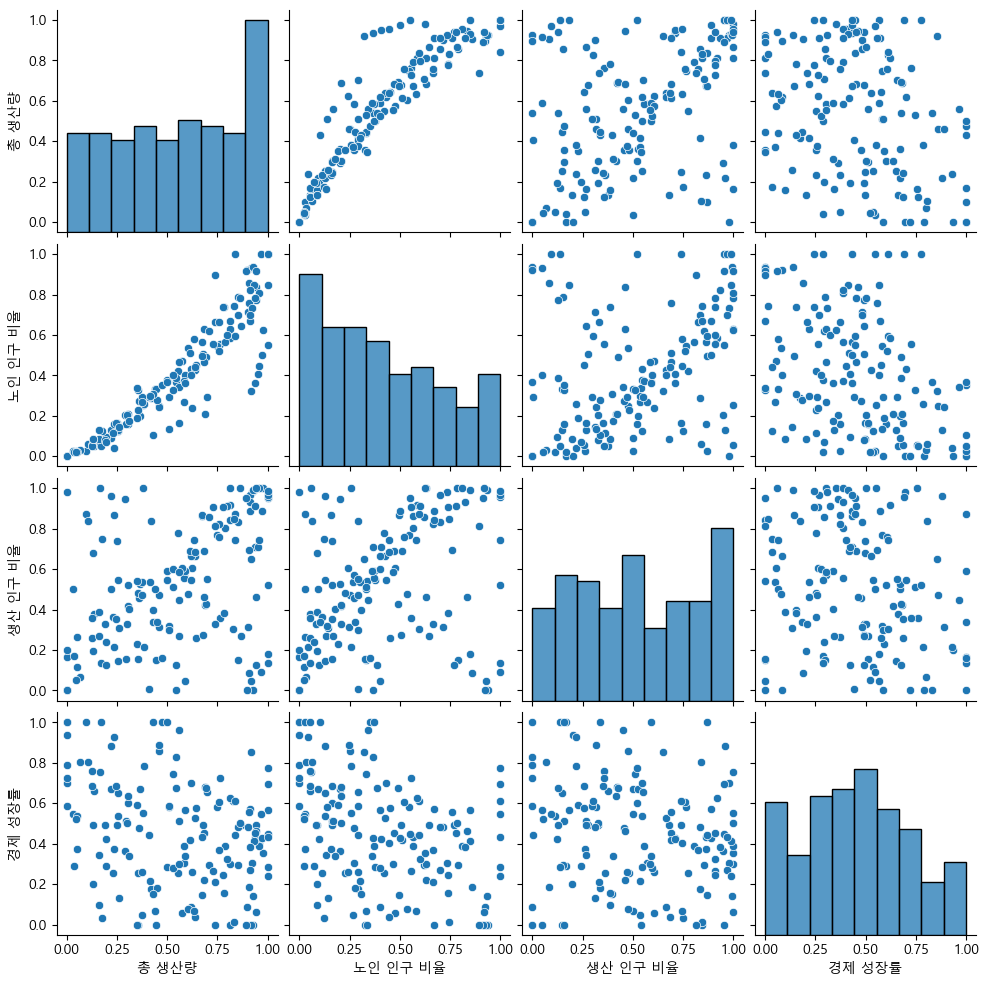

In [54]:
sns.pairplot(final)
plt.show()

In [55]:
final.xs('서울특별시', level=1)

,총 생산량,노인 인구 비율,생산 인구 비율,경제 성장률
연도,,,,
2000,0.000000,0.000000,0.167299,1.000000
2001,0.050358,0.026316,0.264067,0.373626
2002,0.135778,0.052632,0.376432,0.659341
2003,0.159550,0.087719,0.386554,0.098901
2004,0.175530,0.122807,0.748555,0.032967
2005,0.233516,0.157895,0.865339,0.373626
2006,0.292706,0.201754,0.946636,0.362637
2007,0.379255,0.254386,1.000000,0.549451
2008,0.417658,0.289474,0.835662,0.175824


In [56]:
final

총 생산량  노인 인구 비율  생산 인구 비율    경제 성장률
연도   시도                                           
2000 서울특별시  0.000000       0.0  0.167299  1.000000
     부산광역시  0.000000       0.0  0.981226  0.698113
     대구광역시  0.000000       0.0  0.200750  0.935484
     인천광역시  0.000000       0.0  0.000000  0.722628
     광주광역시  0.000000       0.0  0.000000  0.790210
...              ...       ...       ...       ...
2021 대구광역시  1.000000       1.0  0.520577  0.774194
     인천광역시  1.000000       1.0  0.955372  0.693431
     광주광역시  1.000000       1.0  0.969165  0.433566
     대전광역시  1.000000       1.0  0.987084  0.240964
     울산광역시  0.840276       1.0  0.742233  0.610465

[154 rows x 4 columns]

In [57]:
col_years = list(map(str, range(2000,2021)))

In [58]:
df_seoul=final.xs('서울특별시', level=1)
df_seoul

,총 생산량,노인 인구 비율,생산 인구 비율,경제 성장률
연도,,,,
2000,0.000000,0.000000,0.167299,1.000000
2001,0.050358,0.026316,0.264067,0.373626
2002,0.135778,0.052632,0.376432,0.659341
2003,0.159550,0.087719,0.386554,0.098901
2004,0.175530,0.122807,0.748555,0.032967
2005,0.233516,0.157895,0.865339,0.373626
2006,0.292706,0.201754,0.946636,0.362637
2007,0.379255,0.254386,1.000000,0.549451
2008,0.417658,0.289474,0.835662,0.175824


In [59]:
final.plot()

<AxesSubplot:xlabel='연도,시도'>

In [60]:
final.loc[:, :]

총 생산량  노인 인구 비율  생산 인구 비율    경제 성장률
연도   시도                                           
2000 서울특별시  0.000000       0.0  0.167299  1.000000
     부산광역시  0.000000       0.0  0.981226  0.698113
     대구광역시  0.000000       0.0  0.200750  0.935484
     인천광역시  0.000000       0.0  0.000000  0.722628
     광주광역시  0.000000       0.0  0.000000  0.790210
...              ...       ...       ...       ...
2021 대구광역시  1.000000       1.0  0.520577  0.774194
     인천광역시  1.000000       1.0  0.955372  0.693431
     광주광역시  1.000000       1.0  0.969165  0.433566
     대전광역시  1.000000       1.0  0.987084  0.240964
     울산광역시  0.840276       1.0  0.742233  0.610465

[154 rows x 4 columns]

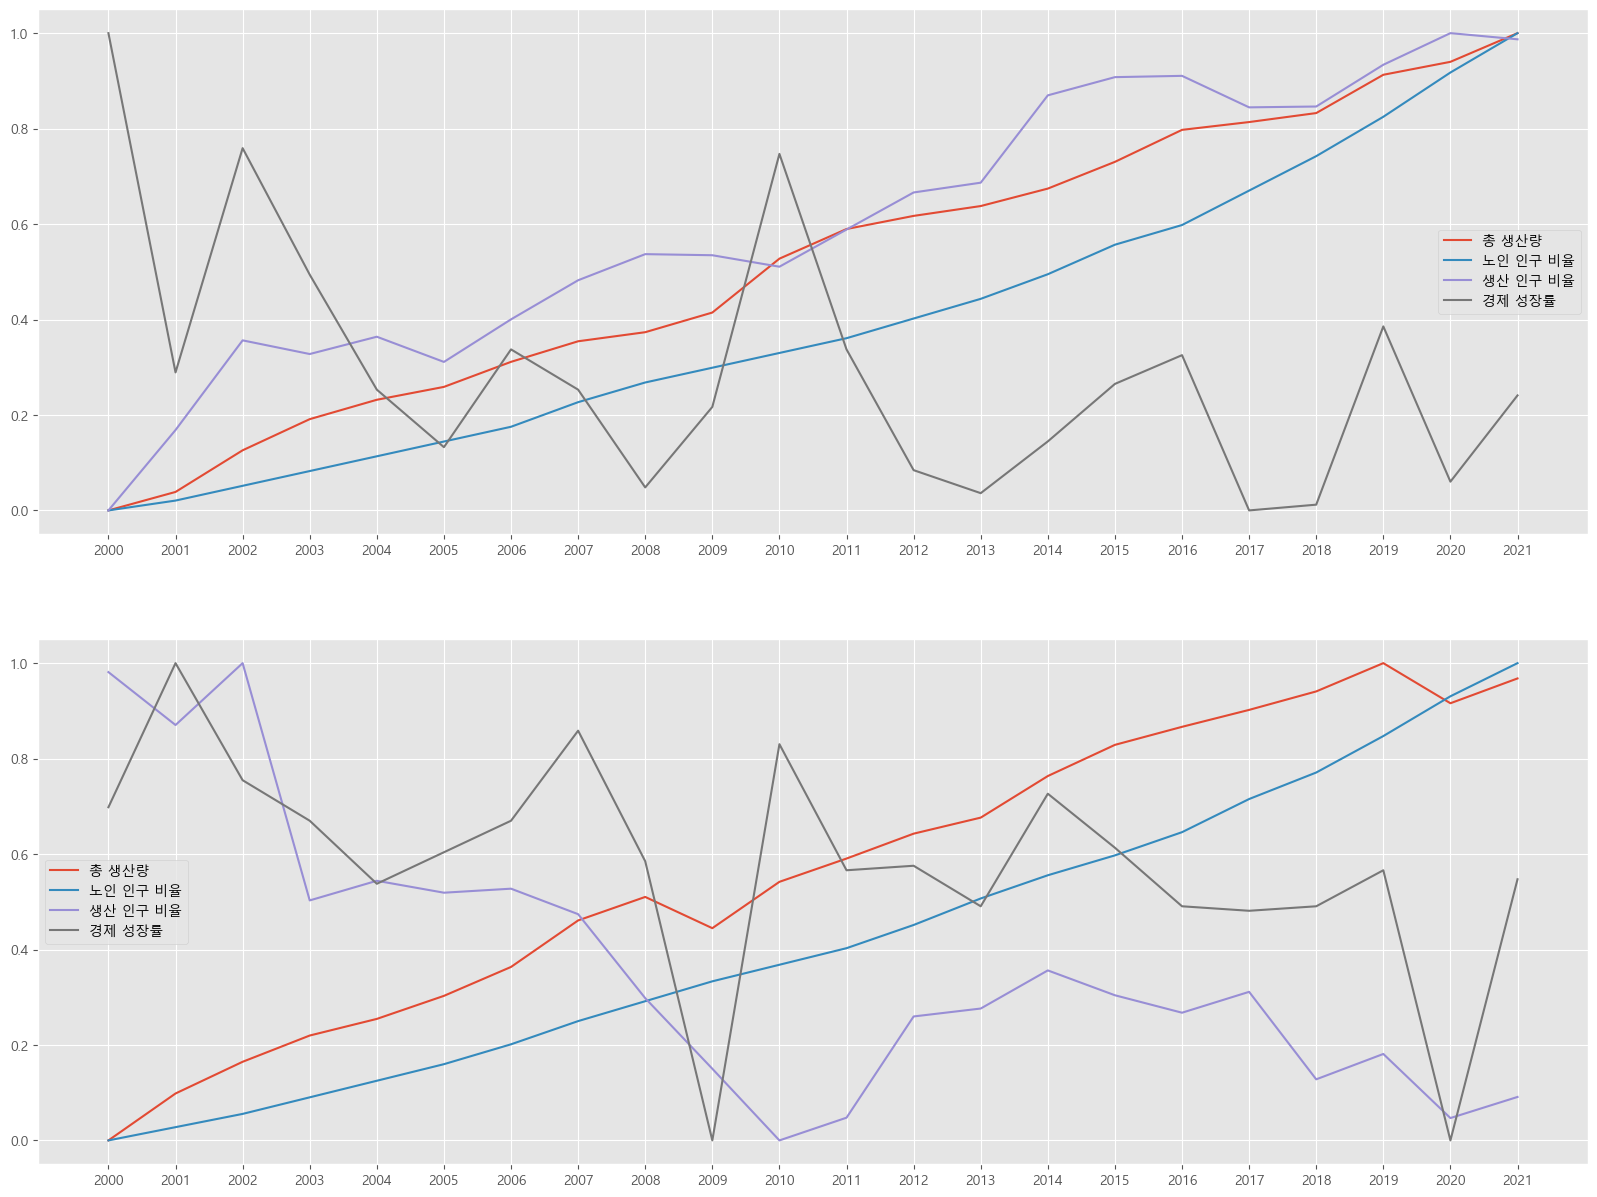

In [62]:
plt.style.use('ggplot')

fig=plt.figure(figsize=(20,15))

ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)

ax1.plot(final.xs('대전광역시', level=1).index,final.xs('대전광역시', level=1), label=final.columns )
ax1.legend()
ax2.plot(final.xs('부산광역시', level=1).index,final.xs('부산광역시', level=1),  label=final.columns)
ax2.legend()
plt.show()